# Yelp Review Analysis
- Harshita Mishra, 31
- Keshav Mishra, 32
- Jaideep More, 35

# 1. Overall Project Objectives  

Yelp is an application to provide the platform for customers to write reviews and provide a star-rating. A research indicates that a one-star increase led to 59% increase in revenue of independent restaurants. Therefore, we see great potential of Yelp dataset as a valuable insights repository.

The main purpose of our project is to conduct thorough analysis on 7 different cuisine types of restaurants which are Korean, Japanese, Chinese, Vietnamese,Thai, French and Italian, figure out what makes a good restaurant and what concerns customers, and then make recommendations of the future improvement and profit growth. Specifically, we will mainly analyze customers' reviews and figure out reasons why customers love or dislike the restaurant. For example, there may be great reviews primarily due to the friendly service, or negative reviews about high price. Meanwhile, we will also compare among those 7 different cuisine types and figure out differences from reviews and gain valuable insights to make customized recommendations to different types of restaurants. 

# 2. Description of Data

The Yelp dataset is downloaded from Kaggle website. In total, there are 5,200,000 user reviews, information on 174,000 business. we will focus on two tables which are business table and review table. Attributes of business table are as following:

* business_id: ID of the business 
* name: name of the business
* neighborhood 
* address: address of the business
* city: city of the business
* state: state of the business
* postal_code: postal code of the business
* latitude: latitude of the business
* longitude: longitude of the business
* stars: average rating of the business
* review_count: number of reviews received
* is_open: 1 if the business is open, 0 therwise
* categories: multiple categories of the business

Attribues of review table are as following:
* review_id: ID of the review
* user_id: ID of the user
* business_id: ID of the business
* stars: ratings of the business
* date: review date
* text: review from the user
* useful: number of users who vote a review as usefull
* funny: number of users who vote a review as funny
* cool: number of users who vote a review as cool

# 3. Direction of Analysis 


**Exploratory data  analysis**
* Count the number of each cuisine type of restaurants
* Count the number of reviews in each cuisine type of restaurants
* Visualize the distribution of restaurants according to the ratings and cuisine types of restaurants.

**Review Analysis**
* Clean the category column in business table into different cuisine types of restaurants and find out how the reviews can help this type of restaurants improve in the future.
* Refer the business id in business table to review table, collect all the reviews of this type of restaurants and perform sentiment analysis to analyze frequent words in positive and negative reviews.
* Implement SVM model to get relatively positive and negative words and get score of each word.
* Get top 10 positive words and negative words in each cuisine type of restaurants in order to figure out the reason of high score and low score.
* Compare among different types of restaurants to figure out the advantages and disadvantages, then we can generate a series of recommendations to this type of restaurants for the future development.
* Overall, recommendations may have different topics which is but not limited to service, food, or decoration, etc. Our analysis is generally based on review words which we can tell from such as rude, overpriced, and slow to find out which aspect in this type of restaurants that they could improve.

# 4.  Summary of Progress 

**Selection and Filtering**
* Filter out 50 states of US.  
* Filter out all restaurants of US. 

**Cleaning**
* Categorize all restaurants by cuisine type using the matching keywords.  
* Delete all records with null category. 
* Remove quotation marks of name and address columns.  
* Label restaurants above rating of 4 as positive, below rating 3 label as negative, label rating 3 as neural.  
* Drop rows with neural label.
* Apply 'bag of words': the frequencies of various words appeared in each review as features and conduct SVM model to get score of each word.  
		
**Reshaping and Reindexing**
* Reindex the data frame.  
* Build a new column to input the new category name and delete the previous column.  
* Convert array to dataframe. 
		
**Visualization**
* Visualize the distribution of restaurants and reviews by category using seaborn.  
* Visualize the distribution of restaurants and reviews by rating. 
* Visualize top 10 negative words and positive words in each cuisine type.

**Manipulation**
* Get a 'polarity score' (a value that reflects the polarity of sentiment) towards each restaurant category, the sentiment score of each word was first multiplied by its frequency, and then normalized by the total number of reviews for the specific category of restaurants.   

**Merging multiple data sets**
* Merge business table and review.  

# 5. Progress in Coding 

## Data Preparation

In [1]:
import pandas as pd
import seaborn as sns
%pylab inline
pd.set_option('display.max_columns',None)
pd.options.display.max_seq_items = 2000
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import requests, re
import pandas as pd
import seaborn as sns
import nltk
import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans
from wordcloud import WordCloud

Populating the interactive namespace from numpy and matplotlib
height has been deprecated.



### Clean Yelp_business dataset 

In [3]:
business = pd.read_csv('yelp_business.csv')
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [4]:
## drop unuseful column 'neighborhood' 
business.drop(['neighborhood'], axis=1, inplace=True)

## remove quotation marks in name and address column
business.name=business.name.str.replace('"','')
business.address=business.address.str.replace('"','')

## filter restaurants of US
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
usa=business.loc[business['state'].isin(states)]
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,"4855 E Warner Rd, Ste B9",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,Stephen Szabo Salon,3101 Washington Rd,McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,Western Motor Vehicle,"6025 N 27th Ave, Ste 1",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,Sports Authority,"5000 Arizona Mills Cr, Ste 435",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [5]:
## select all restaurants in USA
us_restaurants=usa[usa['categories'].str.contains('Restaurants')]

## select out 16 cuisine types of restaurants and rename the category
us_restaurants.is_copy=False
us_restaurants['category']=pd.Series()
us_restaurants.loc[us_restaurants.categories.str.contains('American'),'category'] = 'American'
us_restaurants.loc[us_restaurants.categories.str.contains('Mexican'), 'category'] = 'Mexican'
us_restaurants.loc[us_restaurants.categories.str.contains('Italian'), 'category'] = 'Italian'
us_restaurants.loc[us_restaurants.categories.str.contains('Japanese'), 'category'] = 'Japanese'
us_restaurants.loc[us_restaurants.categories.str.contains('Chinese'), 'category'] = 'Chinese'
us_restaurants.loc[us_restaurants.categories.str.contains('Thai'), 'category'] = 'Thai'
us_restaurants.loc[us_restaurants.categories.str.contains('Mediterranean'), 'category'] = 'Mediterranean'
us_restaurants.loc[us_restaurants.categories.str.contains('French'), 'category'] = 'French'
us_restaurants.loc[us_restaurants.categories.str.contains('Vietnamese'), 'category'] = 'Vietnamese'
us_restaurants.loc[us_restaurants.categories.str.contains('Greek'),'category'] = 'Greek'
us_restaurants.loc[us_restaurants.categories.str.contains('Indian'),'category'] = 'Indian'
us_restaurants.loc[us_restaurants.categories.str.contains('Korean'),'category'] = 'Korean'
us_restaurants.loc[us_restaurants.categories.str.contains('Hawaiian'),'category'] = 'Hawaiian'
us_restaurants.loc[us_restaurants.categories.str.contains('African'),'category'] = 'African'
us_restaurants.loc[us_restaurants.categories.str.contains('Spanish'),'category'] = 'Spanish'
us_restaurants.loc[us_restaurants.categories.str.contains('Middle_eastern'),'category'] = 'Middle_eastern'
us_restaurants.category[:20]

4     American
10         NaN
14    American
28         NaN
29    American
40    Japanese
44     Italian
45         NaN
46         NaN
52    American
53         NaN
54    American
64         NaN
72         NaN
75         NaN
76         NaN
80         NaN
81    American
88         NaN
91     Italian
Name: category, dtype: object

In [6]:
## drop null values in category, delete original column categories and reset the index
us_restaurants=us_restaurants.dropna(axis=0, subset=['category'])
del us_restaurants['categories']
us_restaurants=us_restaurants.reset_index(drop=True)
us_restaurants.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,category
0,PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,581 Howe Ave,Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American
1,fNMVV_ZX7CJSDWQGdOM8Nw,Showmars Government Center,600 E 4th St,Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,American
2,gAy4LYpsScrj8POnCW6btQ,Toast Cafe,2429 Hwy 160 W,Fort Mill,SC,29708,35.047287,-80.990559,3.5,6,0,American
3,tRVx2c89coruPRwYhGTcTw,Yuzu,13603 Madison Ave,Lakewood,OH,44107,41.476846,-81.786971,3.5,78,1,Japanese
4,BnuzcebyB1AfxH0kjNWqSg,Carrabba's Italian Grill,245 Lancaster Ave,Frazer,PA,19355,40.041003,-75.542497,3.5,25,0,Italian
5,Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,6730 S Las Vegas Blvd,Las Vegas,NV,89119,36.066914,-115.170848,4.0,13,1,American
6,n7V4cD-KqqE3OXk0irJTyA,GameWorks,"6587 Las Vegas Blvd S, Ste 171",Las Vegas,NV,89119,36.068259,-115.178877,3.0,349,1,American
7,B5EZlEDH6AVDk8tQGHAGqg,Villa Tap,2302 Packers Ave,Madison,WI,53704,43.123389,-89.355390,4.0,34,1,American
8,F0fEKpTk7gAmuSFI0KW1eQ,Cafe Mastrioni,"4250 S Rainbow Blvd, Ste 1007",Las Vegas,NV,89103,36.111057,-115.241688,1.5,3,0,Italian
9,VdlPZg2NAu8t8GkdbPLecg,Tandoori Times Indian Bistro,"8140 N Hayden Rd, Ste H115",Scottsdale,AZ,85258,33.555212,-111.900456,3.5,263,1,Indian


In [7]:
## check total number of us restaurants
us_restaurants.shape

(19156, 12)

In [8]:
## check whether has duplicated business id
us_restaurants.business_id.duplicated().sum()

0

In [9]:
## check the datatype
us_restaurants.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
category         object
dtype: object

In [10]:
## check missing values
us_restaurants.isnull().sum()

business_id      0
name             0
address          0
city             0
state            0
postal_code     22
latitude         0
longitude        0
stars            0
review_count     0
is_open          0
category         0
dtype: int64

### Clean yelp_review dataset

In [12]:
## load review table
review = pd.read_csv('yelp_review.csv')
review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [13]:
## check missing values
review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

In [14]:
## check duplicates of review_id
review.review_id.duplicated().sum()

0

### Merge two datasets and get new dataframe restaurants_reviews

In [15]:
## merge business table and review table
restaurants_reviews = pd.merge(us_restaurants, review, on = 'business_id')

## update column names
restaurants_reviews.rename(columns={'stars_x':'avg_star','stars_y':'review_star'}, inplace=True)

## add column of number of words in review and label of negative and postive reviews
restaurants_reviews['num_words_review'] = restaurants_reviews.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))
    

In [21]:
## add column of number of words in review and label of negative and postive reviews
restaurants_reviews['num_words_review'] = restaurants_reviews.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))

In [23]:
# label reviews as positive or negative
restaurants_reviews['labels'] = ''
restaurants_reviews.loc[restaurants_reviews.review_star >=4, 'labels'] = 'positive'
restaurants_reviews.loc[restaurants_reviews.review_star ==3, 'labels'] = 'neural'
restaurants_reviews.loc[restaurants_reviews.review_star <3, 'labels'] = 'negative'

# drop neutral reviews for easy analysis
restaurants_reviews.drop(restaurants_reviews[restaurants_reviews['labels'] =='neural'].index, axis=0, inplace=True)
restaurants_reviews.reset_index(drop=True, inplace=True)

restaurants_reviews.head()

## Exploratory Data Analysis

### Restaurants Distribution

#### Distribution of restaurants in each category

In [26]:
plt.style.use('ggplot')

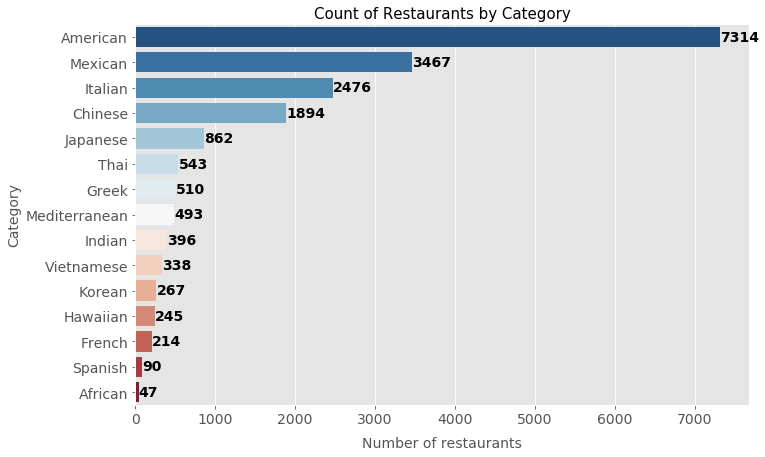

In [383]:
plt.figure(figsize=(11,7))
grouped = us_restaurants.category.value_counts()
sns.countplot(y='category',data=us_restaurants, 
              order = grouped.index, palette= sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(us_restaurants.category.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

Categories in dark blue color have the largest number of restaurants. On the contrary, categories in dark red color have the least number of restaurants. The top 5 type of restaurants are American, Mexican, Italian, Chinese and Japanese. 

#### Top 10 cities with most restaurants

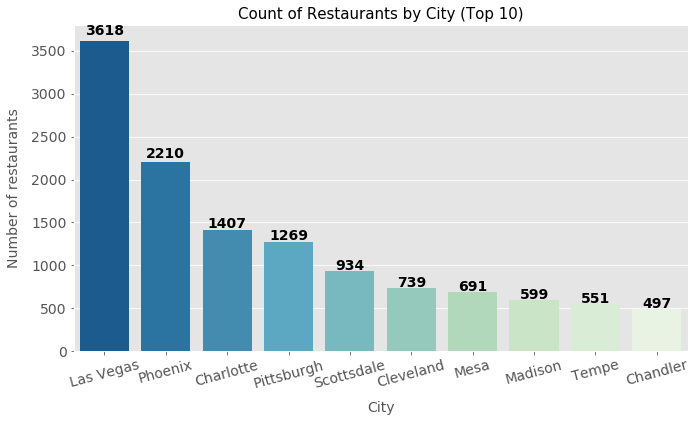

In [384]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.city.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

#### Distribution of restaurants in each state

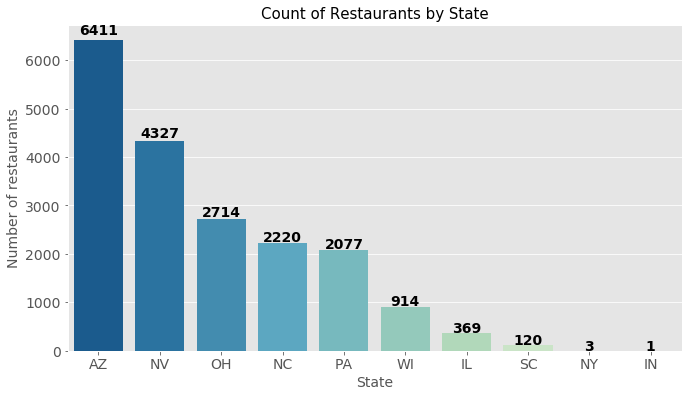

In [385]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.state.value_counts()
sns.barplot(grouped.index, grouped.values,palette=sns.color_palette("GnBu_r", len(grouped)) )
plt.ylabel('Number of restaurants', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.title('Count of Restaurants by State', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center', fontweight='bold', fontsize=14)

### Reviews Distribution

#### Distribution of reviews by cuisine type

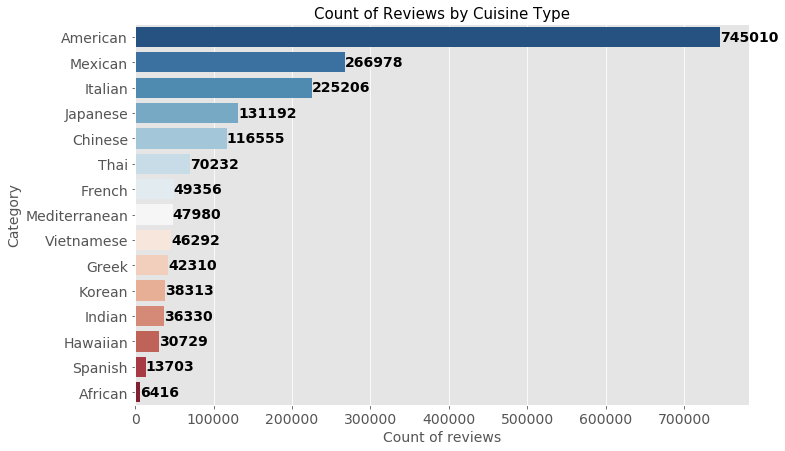

In [386]:
plt.figure(figsize=(11,7))
grouped = us_restaurants.groupby('category')['review_count'].sum().sort_values(ascending = False)
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("RdBu_r", len(grouped)) )
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type', fontsize=15)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=14)
plt.tick_params(labelsize=14)

#### Top 10 cities with most reviews

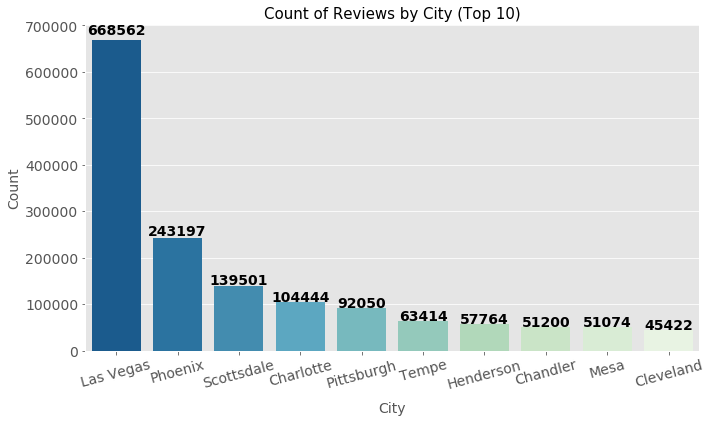

In [387]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.groupby('city')['review_count'].sum().sort_values(ascending=False)[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)) )
plt.xlabel('City', labelpad=10, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Reviews by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

#### Top 9 restaurants with most reviews

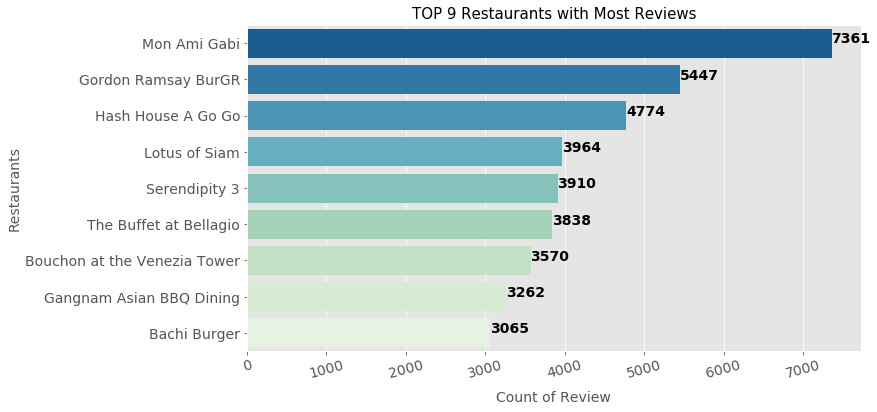

In [388]:
plt.figure(figsize=(11,6))
grouped = us_restaurants[['name','review_count']].sort_values(by='review_count', ascending=False)[:9]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 9 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

#### Distribution of positive and negative reviews in each category

In [33]:
table = pd.pivot_table(restaurants_reviews, values=["review_id"], index=["category"],columns=["labels"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)

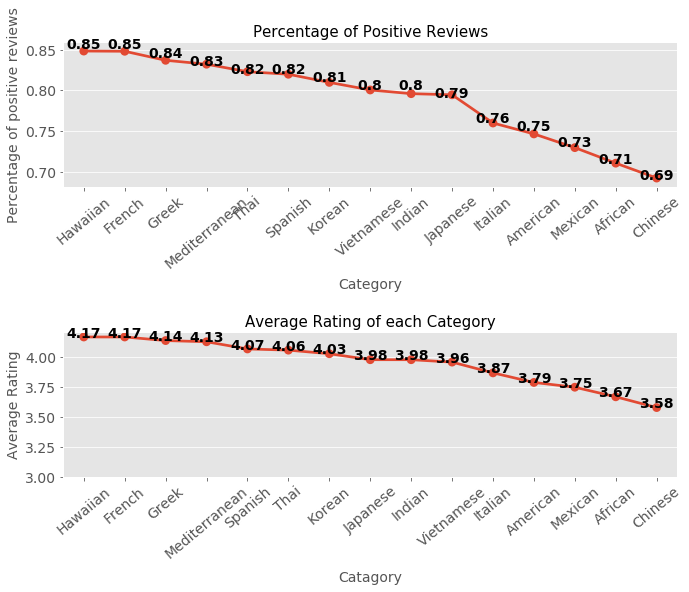

In [389]:
table = pd.pivot_table(restaurants_reviews, values=["review_id"], index=["category"],columns=["labels"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)
plt.figure(figsize=(11,8))
plt.subplot(211)
sns.pointplot(x=table_percentage.index, y= table_percentage.values)
plt.xlabel('Category', labelpad=7, fontsize=14)
plt.ylabel('Percentage of positive reviews', fontsize=14)
plt.title('Percentage of Positive Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(table_percentage.round(2)):
    plt.text(i, v*1.001, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    
plt.subplot(212)
grouped = restaurants_reviews.groupby('category')['review_star'].mean().round(2).sort_values(ascending=False)
sns.pointplot(grouped.index, grouped.values)
plt.ylim(3)
plt.xlabel('Catagory', labelpad=10, fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating of each Category', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(grouped):
    plt.text(i, v, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    
plt.subplots_adjust(hspace=1)

#### Average length of reviews

#### Average length of words in each category

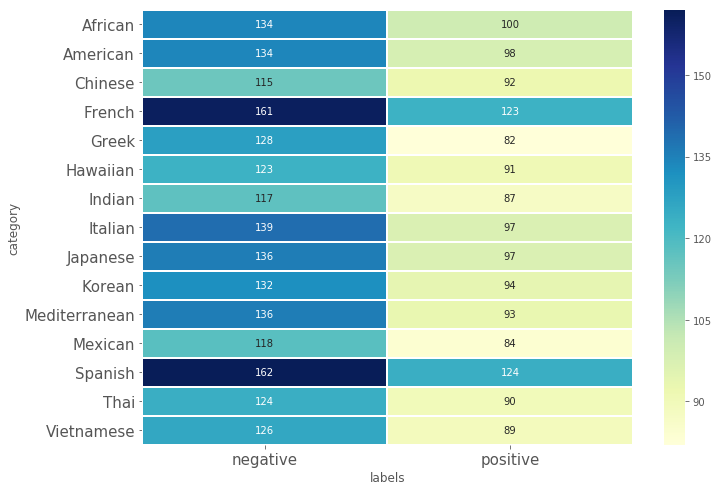

In [390]:
table = restaurants_reviews.groupby(['category','labels'])['num_words_review'].mean().round().unstack()
plt.figure(figsize=(11,8))
sns.heatmap(table, cmap='YlGnBu', fmt='g',annot=True, linewidths=1)
plt.tick_params(labelsize=15)

### Ratings Distribution

#### Distribution of ratings by restaurants

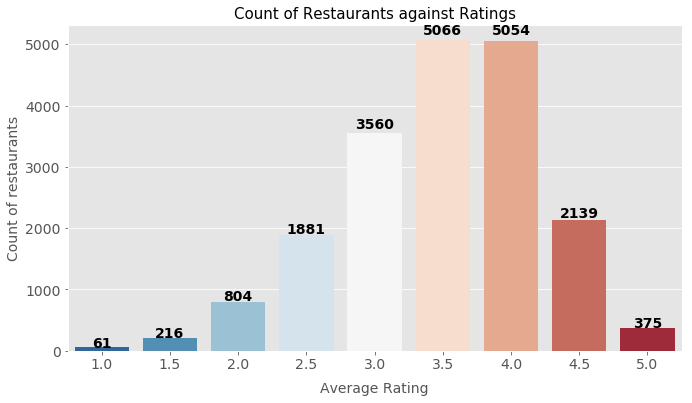

In [391]:
plt.figure(figsize=(11,6))
grouped = us_restaurants.stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Average Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of restaurants', fontsize=14)
plt.title('Count of Restaurants against Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

#### Distribution of ratings by reviews

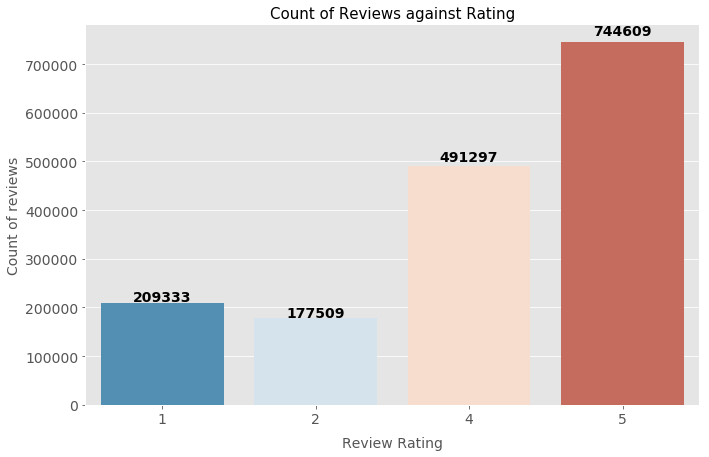

In [392]:
plt.figure(figsize=(11,7))
grouped = restaurants_reviews.review_star.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Review Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews against Rating', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

## Review Analysis

### Positive words and negative words

In [192]:
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [193]:
## convert text to lower case
restaurants_reviews.text = restaurants_reviews.text.str.lower()

## remove unnecessary punctuation
restaurants_reviews['removed_punct_text']= restaurants_reviews.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','')


In [195]:
## import positive file which contains common meaningless positive words such as good
file_positive = open('positive.txt')
reader =csv.reader(file_positive)
positive_words = [word[0] for word in reader]

## import negative file which contains common meaningless positive words such as bad
file_negative = open('negative.txt')
reader =csv.reader(file_negative)
negative_words = [word[0] for word in reader]

In [197]:
## get dataset by category
def get_dataset(category):
    df = restaurants_reviews[['removed_punct_text','labels']][restaurants_reviews.category==category]
    df.reset_index(drop=True, inplace =True)
    df.rename(columns={'removed_punct_text':'text'}, inplace=True)
    return df



## only keep positive and negative words
def filter_words(review):
    words = [word for word in review.split() if word in positive_words + negative_words]
    words = ' '.join(words)
    return words

### Use Korean as an example 

In [199]:
Korean_reviews = get_dataset('Korean')

In [205]:
Korean_train, Korean_test = train_test_split(Korean_reviews[['text','labels']],test_size=0.5)

In [270]:
print('Total %d number of reviews' % Korean_train.shape[0])

Total 16796 number of reviews


In [207]:
def split_data(dataset, test_size):
    df_train, df_test = train_test_split(dataset[['text','labels']],test_size=test_size)
    return df_train

In [208]:
## filter words
Korean_train.text = Korean_train.text.apply(filter_words)

In [209]:
## construct features and labels
terms_train=list(Korean_train['text'])
class_train=list(Korean_train['labels'])

terms_test=list(Korean_test['text'])
class_test=list(Korean_test['labels'])

In [397]:
## get bag of words : the frequencies of various words appeared in each review
vectorizer = CountVectorizer()
feature_train_counts=vectorizer.fit_transform(terms_train)
feature_train_counts.shape

(16796, 2722)

In [211]:
## run model
svm = LinearSVC()
svm.fit(feature_train_counts, class_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Support Vector Machine (SVM) model was applied to differentiate positive and
negative words in reviews, and further to get a word score to understand how positive or how negative the words are.

### Now we can calculate polarity score of each word in the specific category

#### Korean

In [216]:
## create dataframe for score of each word in a review calculated by svm model
coeff = svm.coef_[0]
Korean_words_score = pd.DataFrame({'score': coeff, 'word': vectorizer.get_feature_names()})

In [217]:
## get frequency of each word in all reviews in specific category
Korean_reviews = pd.DataFrame(feature_train_counts.toarray(), columns=vectorizer.get_feature_names())
Korean_reviews['labels'] = class_train
Korean_frequency = Korean_reviews[Korean_reviews['labels'] =='positive'].sum()[:-1]

In [218]:
Korean_words_score.set_index('word', inplace=True)

In [219]:
Korean_polarity_score = Korean_words_score
Korean_polarity_score['frequency'] = Korean_frequency

‘polarity score’ (a value that reflects the polarity of
sentiment) towards each restaurant category, the sentiment
score of each word was first multiplied by its frequency, and
then normalized by the total number of reviews for the specific
category of restaurants.

𝑝𝑜𝑙𝑎𝑟𝑖𝑡𝑦_𝑠𝑐𝑜𝑟𝑒 𝑡, 𝑐 = 𝑠𝑐𝑜𝑟𝑒(𝑡)×
𝑡𝑜𝑡𝑎𝑙_𝑓𝑟𝑒𝑞𝑢𝑒𝑛𝑐𝑦(𝑡, 𝑐)
𝑛𝑢𝑚𝑏𝑒𝑟_𝑜𝑓_ 𝑟𝑒𝑣𝑖𝑒𝑤𝑠(𝑐)

𝑝𝑜𝑙𝑎𝑟𝑖𝑡𝑦_𝑠𝑐𝑜𝑟𝑒 𝑡, 𝑐 is the index for measuring how
essential word 𝑡 is among restaurants of type 𝑐

𝑡𝑜𝑡𝑎𝑙_𝑓𝑟𝑒𝑞𝑢𝑒𝑛𝑐𝑦(𝑡, 𝑐) is the total frequency of word 𝑡 in
all reviews of type 𝑐 restaurants

𝑛𝑢𝑚𝑏𝑒𝑟_𝑜𝑓_ 𝑟𝑒𝑣𝑖𝑒𝑤𝑠(𝑐) is the total number of reviews of
type 𝑐 restaurants.

In [220]:
## calculate polarity score 
Korean_polarity_score['polarity'] = Korean_polarity_score.score * Korean_polarity_score.frequency / Korean_reviews.shape[0]

since the SVM model actually calculate a total
score for each review, and this score to some extent indicates
how satisfied or discontented the customer is. The polarity
score we calculated shows how much a word contributes to the
score of all restaurants of a certain type. For example, the score
of French restaurants is lowered by 0.15 in average due to
‘overpriced’ while is lowered by only 0.02 due to ‘dirty’. Then
we might claim that ‘overpriced’ displeased customers a lot
more than ‘dirty’, and thus ‘overpriced’ is a more essential
(negative) characteristic of French restaurants.
Then for each category of restaurants, the top positive and
negative words are extracted. We may discover what are the
special features for each type and the discrepancy of those
restaurants providing great food around the world.

In order to find specific words that were used to indicate
customers’ concerns for the restaurant, or by moving forward
exploring the unique characteristic of each restaurant category,
adjectives that simply describing the polarity of sentiment (i.e.
“good”, “amazing”, “terrible” and etc.) were neglected.

In [221]:
## drop unnecessary words
unuseful_positive_words = Korean_polarity_score.loc[['great','amazing','love','best','awesome','excellent','good',
                                                    'favorite','loved','perfect','gem','perfectly','wonderful',
                                                    'happy','enjoyed','nice','well','super','like','better','decent','fine',
                                                    'pretty','enough','excited','impressed','ready','fantastic','glad','right',
                                                    'fabulous']]
unuseful_negative_words =  Korean_polarity_score.loc[['bad','disappointed','unfortunately','disappointing','horrible',
                                                     'lacking','terrible','sorry', 'disappoint']]

Korean_polarity_score.drop(unuseful_positive_words.index, axis=0, inplace=True)
Korean_polarity_score.drop(unuseful_negative_words.index, axis=0, inplace=True)

In [222]:
Korean_polarity_score.polarity = Korean_polarity_score.polarity.astype(float)
Korean_polarity_score.frequency = Korean_polarity_score.frequency.astype(float)

In [223]:
Korean_polarity_score[Korean_polarity_score.polarity>0].sort_values('polarity', ascending=False)[:20]

,score,frequency,polarity
word,,,
delicious,0.6719,3174.0000,0.1270
friendly,0.2246,2077.0000,0.0278
attentive,0.4531,838.0000,0.0226
recommend,0.1506,1704.0000,0.0153
fresh,0.1554,1543.0000,0.0143
variety,0.3753,617.0000,0.0138
reasonable,0.4208,496.0000,0.0124
tender,0.3425,562.0000,0.0115
clean,0.1978,965.0000,0.0114


#### Get top 10 most informative positive and negative words

In [314]:
Korean_top_positive_words = ['delicious','friendly','attentive','recommend','fresh','variety','reasonable','tender','clean','authentic']
Korean_top_negative_words = ['bland','slow','expensive','overpriced', 'cold', 'greasy','sweet','fatty','rude','dirty']
Korean_top_words = Korean_polarity_score.loc[Korean_top_positive_words+Korean_top_negative_words,'polarity']

(array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14]),
 <a list of 9 Text xticklabel objects>)

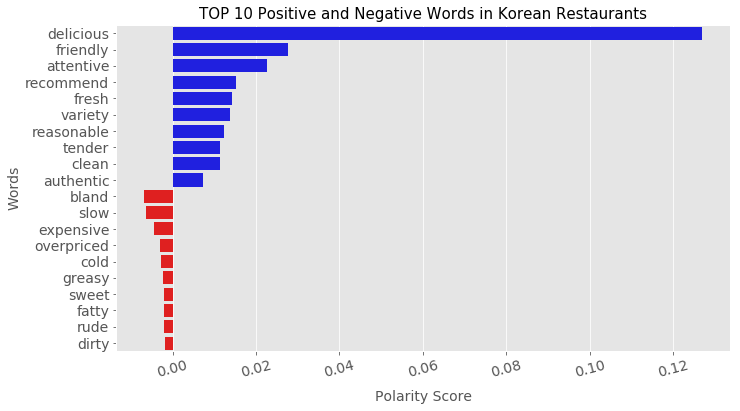

In [315]:
plt.figure(figsize=(11,6))
colors = ['red' if c < 0 else 'blue' for c in Korean_top_words.values]
sns.barplot(y=Korean_top_words.index, x=Korean_top_words.values, palette=colors)
plt.xlabel('Polarity Score', labelpad=10, fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('TOP 10 Positive and Negative Words in Korean Restaurants', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)

In [226]:
def get_polarity_score(dataset):
    dataset.text = dataset.text.apply(filter_words)
    
    terms_train=list(dataset['text'])
    class_train=list(dataset['labels'])
    
    ## get bag of words
    vectorizer = CountVectorizer()
    feature_train_counts=vectorizer.fit_transform(terms_train)
    
    ## run model
    svm = LinearSVC()
    svm.fit(feature_train_counts, class_train)
    
    ## create dataframe for score of each word in a review calculated by svm model
    coeff = svm.coef_[0]
    cuisine_words_score = pd.DataFrame({'score': coeff, 'word': vectorizer.get_feature_names()})
    
    ## get frequency of each word in all reviews in specific category
    cuisine_reviews = pd.DataFrame(feature_train_counts.toarray(), columns=vectorizer.get_feature_names())
    cuisine_reviews['labels'] = class_train
    cuisine_frequency = cuisine_reviews[cuisine_reviews['labels'] =='positive'].sum()[:-1]
    
    cuisine_words_score.set_index('word', inplace=True)
    cuisine_polarity_score = cuisine_words_score
    cuisine_polarity_score['frequency'] = cuisine_frequency
    
    cuisine_polarity_score.score = cuisine_polarity_score.score.astype(float)
    cuisine_polarity_score.frequency = cuisine_polarity_score.frequency.astype(int)
    
    ## calculate polarity score 
    cuisine_polarity_score['polarity'] = cuisine_polarity_score.score * cuisine_polarity_score.frequency / cuisine_reviews.shape[0]
    
    cuisine_polarity_score.polarity = cuisine_polarity_score.polarity.astype(float)
    ## drop unnecessary words
    unuseful_positive_words = ['great','amazing','love','best','awesome','excellent','good',
                                                   'favorite','loved','perfect','gem','perfectly','wonderful',
                                                    'happy','enjoyed','nice','well','super','like','better','decent','fine',
                                                    'pretty','enough','excited','impressed','ready','fantastic','glad','right',
                                                    'fabulous']
    unuseful_negative_words =  ['bad','disappointed','unfortunately','disappointing','horrible',
                                                    'lacking','terrible','sorry']
    unuseful_words = unuseful_positive_words + unuseful_negative_words
    cuisine_polarity_score.drop(cuisine_polarity_score.loc[unuseful_words].index, axis=0, inplace=True)
    
    return cuisine_polarity_score

In [227]:
def plot_top_words(top_words, category):
    plt.figure(figsize=(11,6))
    colors = ['red' if c < 0 else 'blue' for c in top_words.values]
    sns.barplot(y=top_words.index, x=top_words.values, palette=colors)
    plt.xlabel('Polarity Score', labelpad=10, fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.title('TOP 10 Positive and Negative Words in %s Restaurants ' % category, fontsize=15)
    plt.tick_params(labelsize=14)
    plt.xticks(rotation=15)

In [228]:
def get_top_words(dataset, label, number=20):
    if label == 'positive':
        df = dataset[dataset.polarity>0].sort_values('polarity',ascending = False)[:number]
    else:
        df = dataset[dataset.polarity<0].sort_values('polarity')[:number]
    return df

#### Japanese

In [229]:
Japanese_reviews = get_dataset('Japanese')
Japanese_train = split_data(Japanese_reviews, 0.9)
print('Total %d number of reviews' % Japanese_train.shape[0])

In [231]:
Japanese_polarity_score = get_polarity_score(Japanese_train)

In [232]:
get_top_words(Japanese_polarity_score, 'positive')

,score,frequency,polarity
word,,,
delicious,0.6615,2036,0.1167
friendly,0.2257,1418,0.0277
fresh,0.1128,2229,0.0218
recommend,0.2207,1131,0.0216
fun,0.3749,481,0.0156
reasonable,0.4290,363,0.0135
creative,1.1202,130,0.0126
incredible,0.6418,185,0.0103
clean,0.2532,464,0.0102


In [293]:
get_top_words(Japanese_polarity_score,'negative',20)

,score,frequency,polarity
word,,,
hard,-0.2608,296,-0.0067
cold,-0.2751,260,-0.0062
wrong,-0.2515,225,-0.0049
slow,-0.2557,181,-0.0040
bland,-0.8346,55,-0.0040
dark,-0.5480,71,-0.0034
expensive,-0.1524,224,-0.0030
mediocre,-1.1207,29,-0.0028
warm,-0.1792,178,-0.0028


In [312]:
Japanese_top_positive_words = ['delicious','friendly','fresh','recommend','fun','reasonable',
                               'creative','clean','variety','attentive']
Japanese_top_negative_words = ['hard','cold','wrong','slow','bland','dark','expensive',
                               'rude','overpriced','crowded']
Japanese_top_words = Japanese_polarity_score.loc[Japanese_top_positive_words+Japanese_top_negative_words,'polarity']

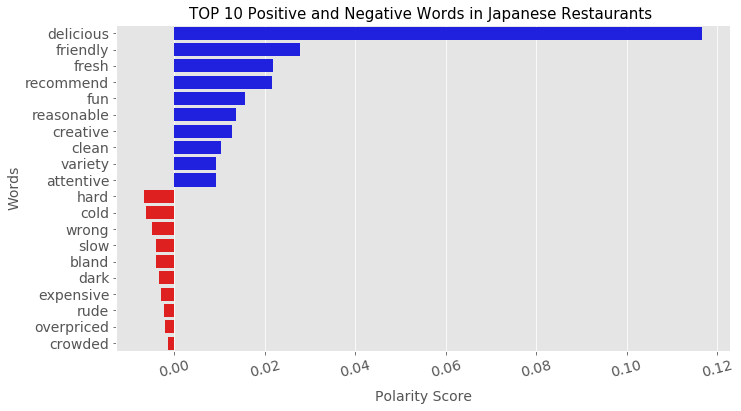

In [313]:
plot_top_words(Japanese_top_words,'Japanese')

#### Thai

In [234]:
Thai_reviews = get_dataset('Thai')
Thai_train = split_data(Thai_reviews, 0.8)
print('Total %d number of reviews' % Thai_train.shape[0])

In [235]:
Thai_polarity_score = get_polarity_score(Thai_train)

In [252]:
get_top_words(Thai_polarity_score,'positive')

,score,frequency,polarity
word,,,
delicious,0.7413,2680,0.1600
friendly,0.2170,1691,0.0295
fresh,0.1861,1393,0.0209
recommend,0.1498,1141,0.0138
incredible,0.9242,184,0.0137
outstanding,0.7979,196,0.0126
reasonable,0.3208,433,0.0112
affordable,0.8539,145,0.0100
die,0.8895,139,0.0100


In [253]:
get_top_words(Thai_polarity_score,'negative')

,score,frequency,polarity
word,,,
sweet,-0.0894,1058,-0.0076
bland,-0.8368,90,-0.0061
greasy,-0.5393,112,-0.0049
expensive,-0.4020,120,-0.0039
weird,-0.6196,77,-0.0038
wrong,-0.2325,193,-0.0036
slow,-0.2350,187,-0.0035
hard,-0.1509,278,-0.0034
cold,-0.2758,151,-0.0034


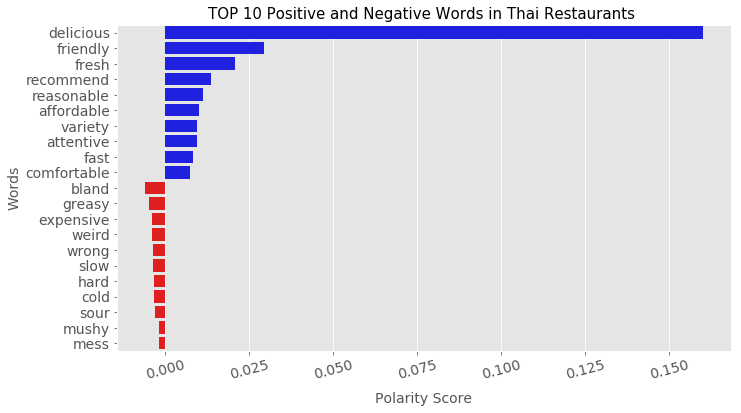

In [296]:
Thai_top_positive_words = ['delicious','friendly','fresh','recommend','reasonable','affordable','variety',
                           'attentive','fast','comfortable']
Thai_top_negative_words = ['bland','greasy','expensive','weird','wrong','slow','hard','cold','sour','mushy','mess']
Thai_top_words = Thai_polarity_score.loc[Thai_top_positive_words+Thai_top_negative_words,'polarity']
plot_top_words(Thai_top_words, 'Thai')

#### Chinese

In [236]:
Chinese_reviews = get_dataset('Chinese')
Chinese_train = split_data(Chinese_reviews, 0.85)
print('Total %d number of reviews' % Chinese_train.shape[0])

In [237]:
Chinese_polarity_score = get_polarity_score(Chinese_train)

In [254]:
get_top_words(Chinese_polarity_score,'positive')

,score,frequency,polarity
word,,,
delicious,0.6612,2183,0.0962
friendly,0.2851,1560,0.0296
fresh,0.2400,1663,0.0266
authentic,0.4215,876,0.0246
reasonable,0.6226,429,0.0178
hot,0.0900,1647,0.0099
fun,0.2994,490,0.0098
fast,0.1521,926,0.0094
tender,0.3241,382,0.0082


In [255]:
get_top_words(Chinese_polarity_score,'negative')

,score,frequency,polarity
word,,,
sour,-0.2035,737,-0.0100
bland,-0.9188,121,-0.0074
cold,-0.4825,213,-0.0068
warm,-0.4105,150,-0.0041
greasy,-0.2736,192,-0.0035
hard,-0.1570,331,-0.0035
slow,-0.3560,135,-0.0032
top,-0.1194,391,-0.0031
wrong,-0.2156,203,-0.0029


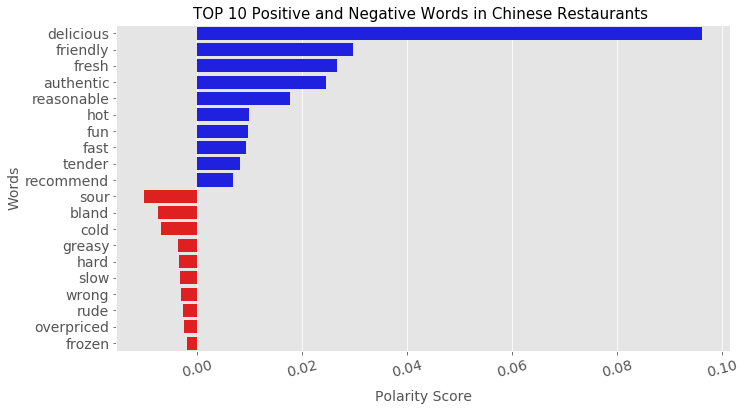

In [297]:
Chinese_top_positive_words = ['delicious','friendly','fresh','authentic','reasonable','hot','fun',
                           'fast','tender','recommend']
Chinese_top_negative_words = ['sour','bland','cold','greasy','hard','slow','wrong','rude','overpriced','frozen']
Chinese_top_words = Chinese_polarity_score.loc[Chinese_top_positive_words+Chinese_top_negative_words,'polarity']
plot_top_words(Chinese_top_words, 'Chinese')

#### Vietnamese

In [242]:
Vietnamese_reviews = get_dataset('Vietnamese')
Vietnamese_train = split_data(Vietnamese_reviews, 0.7)
print('Total %d number of reviews' % Vietnamese_train.shape[0])

In [243]:
Vietnamese_polarity_score = get_polarity_score(Vietnamese_train)

In [256]:
get_top_words(Vietnamese_polarity_score,'positive')

,score,frequency,polarity
word,,,
delicious,0.6264,2387,0.1239
fresh,0.2267,2066,0.0388
friendly,0.2516,1700,0.0354
clean,0.2144,1139,0.0202
helpful,0.8029,234,0.0156
fast,0.2299,688,0.0131
recommend,0.1325,984,0.0108
disappoint,0.9811,111,0.0090
reasonable,0.3145,323,0.0084


In [299]:
get_top_words(Vietnamese_polarity_score,'negative')

,score,frequency,polarity
word,,,
bland,-0.9098,81,-0.0061
wrong,-0.3022,221,-0.0055
hard,-0.1531,326,-0.0041
slow,-0.2999,149,-0.0037
warm,-0.1898,212,-0.0033
expensive,-0.3662,109,-0.0033
top,-0.1000,373,-0.0031
cold,-0.1612,229,-0.0031
rude,-0.8573,41,-0.0029


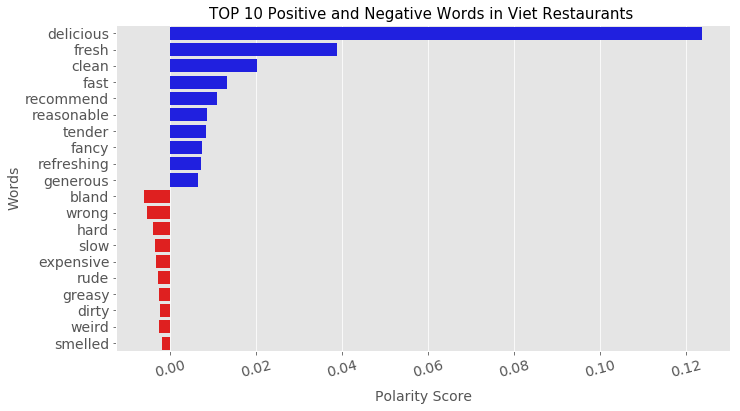

In [302]:
Viet_top_positive_words = ['delicious','fresh','clean','fast','recommend','reasonable','tender',
                           'fancy','refreshing','generous']
Viet_top_negative_words = ['bland','wrong','hard','slow','expensive','rude','greasy','dirty','weird','smelled']
Viet_top_words = Vietnamese_polarity_score.loc[Viet_top_positive_words+Viet_top_negative_words,'polarity']
plot_top_words(Viet_top_words,'Viet')

#### French

In [245]:
French_reviews = get_dataset('French')
French_train = split_data(French_reviews, 0.7)
print('Total %d number of reviews' % French_train.shape[0])

In [246]:
French_polarity_score = get_polarity_score(French_train)

In [258]:
get_top_words(French_polarity_score,'positive')

,score,frequency,polarity
word,,,
delicious,0.5658,3708,0.1603
perfection,0.8013,378,0.0232
sweet,0.2269,1210,0.0210
tender,0.4558,596,0.0208
impeccable,1.1210,221,0.0189
recommend,0.1885,1303,0.0188
rich,0.3804,584,0.0170
incredible,0.5361,413,0.0169
die,0.6156,357,0.0168


In [306]:
get_top_words(French_polarity_score, 'negative')

,score,frequency,polarity
word,,,
cold,-0.5965,277,-0.0126
expensive,-0.2709,370,-0.0077
slow,-0.3897,220,-0.0066
balanced,-0.8546,98,-0.0064
bland,-0.9045,77,-0.0053
disappointment,-0.7985,67,-0.0041
overpriced,-0.6852,75,-0.0039
work,-0.1362,360,-0.0037
mediocre,-1.3296,35,-0.0036


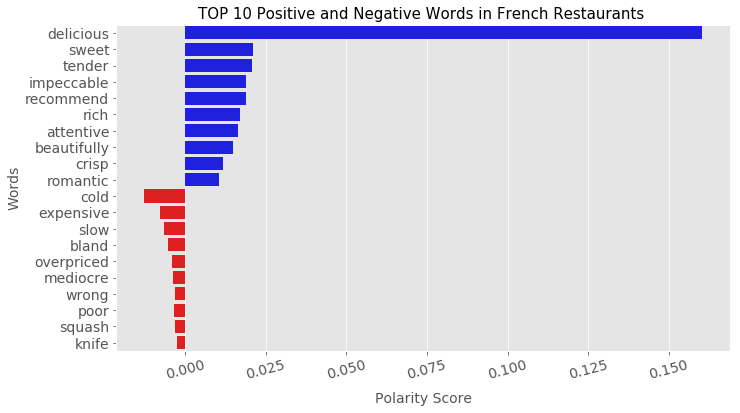

In [305]:
French_top_positive_words = ['delicious','sweet','tender','impeccable','recommend','rich','attentive',
                             'beautifully','crisp','romantic']
French_top_negative_words = ['cold','expensive','slow','bland','overpriced','mediocre','wrong',
                             'poor','squash','knife']
French_top_words = French_polarity_score.loc[French_top_positive_words+French_top_negative_words,'polarity']
plot_top_words(French_top_words,'French')

#### Italian

In [250]:
Italian_reviews = get_dataset('Italian')
Italian_train = split_data(Italian_reviews, 0.9)
print('Total %d number of reviews' % Italian_train.shape[0])

In [251]:
Italian_polarity_score = get_polarity_score(Italian_train)

In [307]:
get_top_words(Italian_polarity_score, 'positive',30)

,score,frequency,polarity
word,,,
delicious,0.5706,3742,0.1077
fresh,0.2857,2412,0.0348
friendly,0.2076,2389,0.0250
recommend,0.1924,1621,0.0157
delightful,1.5726,121,0.0096
reasonable,0.3743,506,0.0096
incredible,0.4743,388,0.0093
die,0.4470,404,0.0091
outstanding,0.3159,497,0.0079


In [308]:
get_top_words(Italian_polarity_score, 'negative',30)

,score,frequency,polarity
word,,,
cold,-0.5457,254,-0.0070
warm,-0.1965,502,-0.0050
hard,-0.1669,495,-0.0042
wrong,-0.2188,367,-0.0040
bland,-0.7893,99,-0.0039
expensive,-0.2423,271,-0.0033
slow,-0.2654,227,-0.0030
greasy,-0.2811,187,-0.0027
work,-0.1056,488,-0.0026


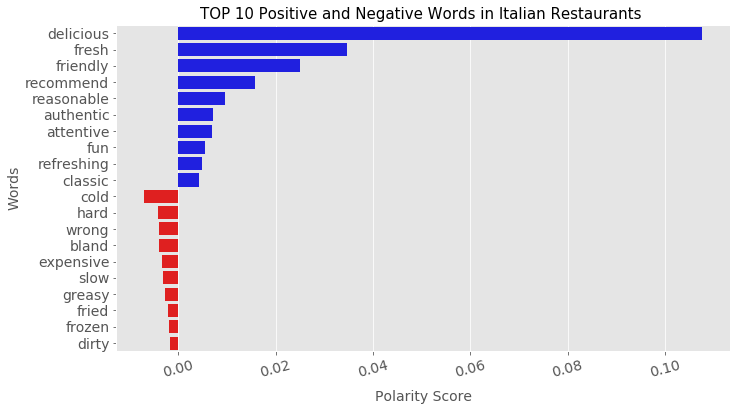

In [309]:
Italian_top_positive_words = ['delicious','fresh','friendly','recommend','reasonable','authentic',
                             'attentive','fun','refreshing','classic']
Italian_top_negative_words = ['cold','hard','wrong','bland','expensive','slow','greasy','fried','frozen','dirty']
Italian_top_words = Italian_polarity_score.loc[Italian_top_positive_words+Italian_top_negative_words,'polarity']
plot_top_words(Italian_top_words,'Italian')

### Combine all top words to compare among different cuisine typies

In [354]:
all_category = {'cuisine':['Korean','Japanese','Chinese','Thai','Vietnamese','French','Italian']}
cuisine_positive_words = pd.DataFrame(all_category)
for i,word in enumerate(Korean_top_positive_words):
    cuisine_positive_words.loc[0,i] = word

In [358]:
for i,word in enumerate(Korean_top_positive_words):
    cuisine_positive_words.iloc[0,i] = word
for i,word in enumerate(Japanese_top_positive_words):
    cuisine_positive_words.iloc[1,i] = word
for i,word in enumerate(Chinese_top_positive_words):
    cuisine_positive_words.iloc[2,i] = word
for i,word in enumerate(Thai_top_positive_words):
    cuisine_positive_words.iloc[3,i] = word
for i,word in enumerate(Viet_top_positive_words):
    cuisine_positive_words.iloc[4,i] = word
for i,word in enumerate(French_top_positive_words):
    cuisine_positive_words.iloc[5,i] = word
for i,word in enumerate(Italian_top_positive_words):
    cuisine_positive_words.iloc[6,i] = word

cuisine_positive_words.drop(9,axis=1,inplace=True)
cuisine_positive_words.columns=['0','1','2','3','4','5','6','7','8','9']
cuisine_positive_words['cuisine']=['Korean','Japanese','Chinese','Thai','Vietnamese','French','Italian']
cuisine_positive_words.set_index('cuisine', inplace=True)

In [375]:
all_category = {'cuisine':['Korean','Japanese','Chinese','Thai','Vietnamese','French','Italian']}
cuisine_negative_words = pd.DataFrame(all_category)
for i,word in enumerate(Korean_top_negative_words):
    cuisine_negative_words.loc[0,i] = word

In [377]:
for i,word in enumerate(Korean_top_negative_words):
    cuisine_negative_words.iloc[0,i] = word
for i,word in enumerate(Japanese_top_negative_words):
    cuisine_negative_words.iloc[1,i] = word
for i,word in enumerate(Chinese_top_negative_words):
    cuisine_negative_words.iloc[2,i] = word
for i,word in enumerate(Thai_top_negative_words):
    cuisine_negative_words.iloc[3,i] = word
for i,word in enumerate(Viet_top_negative_words):
    cuisine_negative_words.iloc[4,i] = word
for i,word in enumerate(French_top_negative_words):
    cuisine_negative_words.iloc[5,i] = word
for i,word in enumerate(Italian_top_negative_words):
    cuisine_negative_words.iloc[6,i] = word

cuisine_negative_words.drop(9,axis=1,inplace=True)
cuisine_negative_words.columns=['0','1','2','3','4','5','6','7','8','9']
cuisine_negative_words['cuisine']=['Korean','Japanese','Chinese','Thai','Vietnamese','French','Italian']
cuisine_negative_words.set_index('cuisine', inplace=True)

In [374]:
cuisine_positive_words

,0,1,2,3,4,5,6,7,8,9
cuisine,,,,,,,,,,
Korean,delicious,friendly,attentive,recommend,fresh,variety,reasonable,tender,clean,authentic
Japanese,delicious,friendly,fresh,recommend,fun,reasonable,creative,clean,variety,attentive
Chinese,delicious,friendly,fresh,authentic,reasonable,hot,fun,fast,tender,recommend
Thai,delicious,friendly,fresh,recommend,reasonable,affordable,variety,attentive,fast,comfortable
Vietnamese,delicious,fresh,clean,fast,recommend,reasonable,tender,fancy,refreshing,generous
French,delicious,sweet,tender,impeccable,recommend,rich,attentive,beautifully,crisp,romantic
Italian,delicious,fresh,friendly,recommend,reasonable,authentic,attentive,fun,refreshing,classic


In [380]:
cuisine_negative_words

,0,1,2,3,4,5,6,7,8,9
cuisine,,,,,,,,,,
Korean,bland,slow,expensive,overpriced,cold,greasy,sweet,fatty,rude,dirty
Japanese,hard,cold,wrong,slow,bland,dark,expensive,rude,overpriced,crowded
Chinese,sour,bland,cold,greasy,hard,slow,wrong,rude,overpriced,frozen
Thai,bland,greasy,expensive,weird,wrong,slow,hard,cold,sour,mushy
Vietnamese,bland,wrong,hard,slow,expensive,rude,greasy,dirty,weird,smelled
French,cold,expensive,slow,bland,overpriced,mediocre,wrong,poor,squash,knife
Italian,cold,hard,wrong,bland,expensive,slow,greasy,fried,frozen,dirty


# 6. Findings

In general, We found out that for most restaurant types, delicious ranks first among all positive words, indicating that tastes might weight more than other factors like service and price when people are judging a restaurant. For most cuisine types, the word friendly rank first before the word reasonable, which means the friendly service is more likely to be the reason for the high score rather than reasonable price. It could also be observed that when it comes to the flavor of food, customers value freshness more than tastiness. 

Different characteristics are also shown for different restaurant categories. Vietnamese and Italian food received
positive feedback because of freshness, while French restaurants received positive reviews for their sweet food. However, sweet food is the reason for Korean restaurants to have negative reviews. Korean, Japanese, Chinese, and Thai have positive reviews mainly for their friendly service, especially for Korean restaurants, since attentive ranks third. The variety of food is also the reason of high score for Korean, Japanese and Thai cuisine types. Fun and creative are special charateristics for Japanese restaurants. For Italian cuisine type, customers prefer classic Italian food. The reason of high score in French cuisine type is related to the romantic and beautiful appearence or environment.

From the negative word list, we could observe that bland is one of the main problems for Korean, Thai and Vietnamese restaurants, which means customers expect food of those three cuisine type should be spicy. For French, Italian and Japanese cuisine types of restaurants, it is likely to have the low score because the food is cold. The low score of Japanese cuisine type is also due to the dark and crowded environment. Sour is one of the main problems for Chinese cuisine type. Slow service is the main negative characteristic for Korean and French. French cuisine type receive negative reviews also for the expensive price. Thai receive negative reviews mainly for greasy food.

Since our analysis may help to extract specific features from
any set of reviews, restaurant owners can make good use of it
for essential information once they received a certain amount
of Yelp reviews. From those reviews they can understand why
customers love or dislike their restaurants, maybe great reviews
primarily due to fresh food, or perhaps unsatisfied reviews
caused by too high price. Meanwhile they can also compare the
restaurant with similar restaurants within the same type.

# 7. Recommendation

## Korean

For food, prioritize taste as the most important selling point. Pay more attention to using fresh ingredients and keeping tender texture of meat. Control the cooking process to prevent greasy or too sweet, but do not lose flavor. It might be helpful to make some creations on dishes and make it look authentically attractive;<br>
For service, invest on waiters/waitress training. Make them highly professional in servicing customers, avoiding mistakes such as serving wrong food and paying more attention to caring customers all the time. Make sure they are friendly and nice to customers;<br>
For marketing strategy, invest on advertisement on social media and adjust price if overpriced. Make creation in menu and increase the variety to attract customers. And keep the environment clean. Make adjustment on price if it is overpriced.

## Japanese

For food, except prioritizing cooking food delicious, using fresh ingredients is extremely important for Japanese restaurants. Besides, they can make creations on traditional food in order to attract customers and increase varieties of dishes in menu; 

For service, train the waiters to provide friendly and attentive care for customers and avoid mistakes such as serving wrong food; 

For management, to those restaurants serving raw Japanese dish, we highly recommend that they can invest on technology to protect ingredients fresh or shorten the transportation time to avoid spoilage. Keep cleaning environment and fun. Make corresponding change according to customers feedback such as what are their feelings to the surroundings like the lighting, air condition temperature or the decoration. If there was too crowded, try to enlarge the dining area or redesign the table. Setting reasonable price and make adjustments on highly expensive price could also attract customers.

## Chinese

For Chinese restaurants, delicious and authentic food is more likely to receive high-rating reviews so tasty is always at the first place. People also like hot taste but not too sour or bland. And restaurants can make some improvements on cooking way especially for the greasy cuisine and it is great to use fresh ingredients.

For service, restaurants can train waiters to perform nice, fast and professional service. In order to attract more customers, reasonable price is also important.

## Thai

Tasty food is the priority.  For Thai food, people like fresh taste but not too sour or too bland. They appreciate food with high variety. And they seem not like mushy or greasy. It is also necessary to see if some food taste weird for local customers;<br>

For service, besides some common requirements such as friendly and attentive service, customers also like fast and hate waiting because of ‘slow’ service;<br>

For management, customer like reasonable price and comfortable environment.


## Vietnamese

For Vietnam restaurants, beside some common requirements, people gave high reviews to some about their clean and fancy environment. But they also complain about dirty ones. So, there may diverse conditions in restaurants which dirty ones can learn from it and know where they need to improve. Reasonable price is popular factor to influence their reviews as well.

Speaking of food, customer like tender taste and they like when restaurants serve generously. It may be a good way to attract customers. And they also like fresh and do not like greasy or bland.

For service, it seems there are serious issues about wrong and slow service. Even ‘rude’ came much more frequently than other types. So, providing good service and having nice and professional waiters are significant.


## French

For Vietnam restaurants, beside some common requirements, people gave high reviews to some about their clean and fancy environment. But they also complain about dirty ones. So, there may diverse conditions in restaurants which dirty ones can learn from it and know where they need to improve.

Speaking of food, customer like tender taste and they like when restaurants serve generously. It may be a good way to attract customers. And they also like fresh and do not like greasy or bland.

For service, it seems there are serious issues about wrong and slow service. Even ‘rude’ came much more frequently than other types. So, providing good service and having nice and professional waiters are significant.


## Italian 

For Vietnam restaurants, beside some common requirements, people gave high reviews to some about their clean and fancy environment. But they also complain about dirty ones. So, there may diverse conditions in restaurants which dirty ones can learn from it and know where they need to improve.

Speaking of food, customer like tender taste and they like when restaurants serve generously. It may be a good way to attract customers. And they also like fresh and do not like greasy or bland.

For service, it seems there are serious issues about wrong and slow service. Even ‘rude’ came much more frequently than other types. So, providing good service and having nice and professional waiters are significant.
